# Can you detect cascading failures as delays in one airport create delays in others?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

## Importing the datasets required for Q4

In [2]:
cleaned_dataset = pd.read_csv("C:/Users/94772/OneDrive/Documents/PROG CW - final/cleaned_dataset.csv")

## Filter out cancelled flights

In [3]:
q4 = cleaned_dataset[cleaned_dataset.Cancelled == 0]

In [4]:
q4['Total_Delay'] = q4['Total_Delay'].fillna(0)

## Filter out flights with missing scheduled departure times and tail number

In [5]:
q4 = q4.dropna(subset=['TailNum', 'CRSDepTime'])
q4

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743,745,1024,1018,US,343,...,45,13,0,0,0,0,0,0,0,4
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10
4,2006,1,11,3,824,832,1015,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74


## Sort the dataframe by tail number and scheduled departure time

In [7]:
q4 = q4.sort_values(['TailNum', 'CRSDepTime'])

## Find the previous airport delay for each plane

In [8]:
q4['PrevAirportDelay'] = q4.groupby('TailNum')['Total_Delay'].shift(1)
q4['PrevAirportDelay']

2681170      NaN
3289603    -12.0
10529320    -8.0
149224       2.0
144791       0.0
            ... 
14192060    48.0
14192061    -1.0
14191895    29.0
14192065   -85.0
14191891    59.0
Name: PrevAirportDelay, Length: 14268928, dtype: float64

## Drop flights without a previous airport delay

In [9]:
q4 = q4.dropna(subset=['PrevAirportDelay'])S

## Create a scatter plot

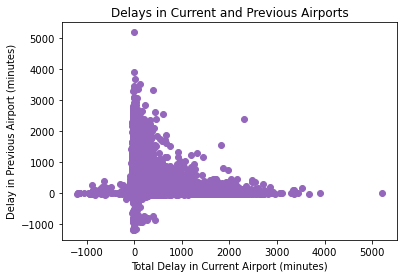

In [10]:
plt.scatter(q4['Total_Delay'], q4['PrevAirportDelay'], color ="#9467bd")
plt.xlabel('Total Delay in Current Airport (minutes)')
plt.ylabel('Delay in Previous Airport (minutes)')
plt.title('Delays in Current and Previous Airports')
plt.show()

## Calculate the correlation coefficient 

In [11]:
corr, p_val = pearsonr(q4['Total_Delay'], q4['PrevAirportDelay'])

print('Correlation Coefficient:', corr)
print('P-value:', p_val)

Correlation Coefficient: 0.06381514979167713
P-value: 0.0


## Check if the correlation is statistically significant

In [12]:
if p_val < 0.05:
    print('The correlation coefficient is statistically significant.')
else:
    print('The correlation coefficient is not statistically significant.')


The correlation coefficient is statistically significant.


## Defining the hypothesis

In [13]:
print("Defining the hypothesis")

print("H0: There is no correlation between the delays in the current and previous airports") 
print("H1: There is a correlation between the delays in the current and previous airports.")

Defining the hypothesis
H0: There is no correlation between the delays in the current and previous airports
H1: There is a correlation between the delays in the current and previous airports.


## Perform the hypothesis test

In [14]:
#Set the significance level
alpha = 0.05

##Calculate the degrees of freedom
n = len(q4)
df = n - 2

#Calculate the t-statistic
t = corr * np.sqrt(df) / np.sqrt(1 - corr**2)

##Calculate the critical value
critical_value = stats.t.ppf(alpha/2, df)


#Check if the t-statistic is greater than the critical value
if np.abs(t) > critical_value:
    print("Reject the null hypothesis - There is a significant correlation between the delays in the current and previous airports.")
else:
    print("Fail to reject the null hypothesis - There is no significant correlation between the delays in the current and previous airports.")

Reject the null hypothesis - There is a significant correlation between the delays in the current and previous airports.
